### Trực quan hóa Naive Bayes
- 

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from utils import confidence_ellipse
from utils import process_tweet
import nltk 
from nltk.corpus import twitter_samples


- Tính likelihood cho từng tweet:
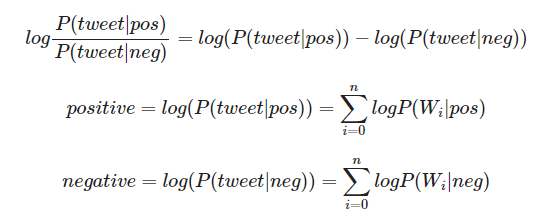

In [4]:
class NaiveBayesModel():
    def __init__(self):
        self.positive_raw = twitter_samples.strings("positive_tweets.json")
        self.negative_raw = twitter_samples.strings("negative_tweets.json")

        self.init_freq_vocab()
        self.calc_lamda()

    def init_freq_vocab(self):
        self.freq = {}
        self.vocab = set()
        for data in self.positive_raw:
            positive = process_tweet(data)
            for word in positive:
                self.vocab.add(word)
                if (word, 1) in self.freq:
                    self.freq[(word, 1)] += 1
                else:
                    self.freq[(word, 1)] = 1
        for data in self.negative_raw:
            negative = process_tweet(data)
            for word in negative:
                if (word, 0) in self.freq:
                    self.freq[(word, 0)] += 1
                else:
                    self.freq[(word, 0)] = 1
                self.vocab.add(word)

        for word in self.vocab:
            if (word, 1) not in self.freq:
                self.freq[(word, 1)] = 0
            if (word, 0) not in self.freq:
                self.freq[(word, 0)] = 0
                
    def calc_lamda(self):
        self.lamda = {}
        for word in self.vocab:
            self.lamda[word] = np.log((self.freq[(word, 1)] + 1) / (len(self.positive_raw) + len(self.vocab))) \
                             - np.log((self.freq[(word, 0)] + 1) / (len(self.negative_raw) + len(self.vocab)))
    
    def predict(self, text):
        text = process_tweet(text)
        score = 0.0
        for word in text:
            if word in self.lamda:
                score += self.lamda[word]
        return 1 if score > 0 else 0

In [5]:
model = NaiveBayesModel()

In [6]:
model.lamda[':)']

7.08142843482205

In [9]:
import random
labels = np.concatenate((
    np.ones(len(model.positive_raw)), 
    np.zeros(len(model.negative_raw))))

tweets = model.positive_raw + model.negative_raw

combined = list(zip(tweets, labels))
random.shuffle(combined)

In [11]:
combined[:5]

[('@GeenaEhlich I know fml :(', 0.0),
 ('You mean Aamir Khan is one out of them.  :)  https://t.co/uQ7DRil5bj', 1.0),
 ('@sarahbournex me too :( determined not to feel ill for tonight!!!', 0.0),
 ("@MrsManfyDiston Thanks for following! Do get in touch if you'd like any more info about our project: youth@bipolaruk.org.uk :)",
  1.0),
 ('Walking alone is not difficult. But when we walked a mile someone... Then coming back alone is Very Difficult.. :( : (\n#S #h #O #n #U',
  0.0)]

In [12]:
def accuracy(model, combined, num_examples = 1000):
    random.shuffle(combined)
    acc = 0
    for i in range(num_examples):
        text, label = combined[i]
        model_pred = model.predict(text)
        if (label == model_pred):
            acc += 1
    return 1.0 * acc / num_examples

In [17]:
accuracy(model, combined)

0.998